# 1. Project Overview

## Interactive Visualization Dashboard for Global Temperature Data

### Project Overview

This project involves creating an interactive visualization dashboard to explore global temperature records from 1743 to 2013. The goal is to analyze and visualize trends in temperature data over time, compare temperatures across major cities, and examine average temperatures by country.

### Tools and Libraries

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Matplotlib**: For static, interactive, and animated visualizations.
- **Seaborn**: For statistical data visualization.

### Dataset

The dataset used is `GlobalLandTemperaturesByMajorCity.csv`, which includes columns:
- `dt`: Date
- `AverageTemperature`: Average temperature in degrees Celsius
- `AverageTemperatureUncertainty`: Uncertainty in the average temperature
- `City`: City where the temperature was recorded
- `Country`: Country where the city is located
- `Latitude`: Latitude of the city
- `Longitude`: Longitude of the city
***

# 2. Loading and Exploring the Dataset
### Data Loading

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("GlobalLandTemperatures.csv")
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


### Data Exploration



In [30]:
# Check for missing values and data types
df.info()

# Summary statistics
df.describe()

# check for null Values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

#### Initial Observations

###### - The dataset contains temperature records from various cities across the world.
###### - We need to convert the `dt` column to datetime format for better analysis.
###### - The dataset contains approximately 11,002 missing values each in the `AverageTemperature` and `AverageTemperatureUncertainty` columns, which            is about 4.6% of the total data, As the proportion of missing values is relatively small, we have opted to drop these rows to             simplify           the analysis
***

# 3. Data Preprocessing

In [31]:
# Convert 'dt' column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Drop rows with missing values in 'AverageTemperature' and 'AverageTemperatureUncertainty'
df = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Set datetime column as index
df.set_index('dt', inplace=True)

### Steps Taken

###### 1. **Convert Date Column**: Changed `dt` to datetime format to enable time-based analysis.
###### 2. **Handle Missing Values**: Dropped rows with missing values for a cleaner dataset.
###### 3. **Set Index**: Set the `dt` column as the index for easier time-based operations.
___



# 4. Data Aggregation


In [48]:
# Add a 'Month' column for aggregation purposes
df['Month'] = df.index.to_period('M')

# Aggregate by month to get the average temperature
df_monthly = df.groupby('Month')['AverageTemperature'].mean()


# Aggregate data by city and country
city_avg_temp = df.groupby('City')['AverageTemperature'].mean().sort_values(ascending=False)
country_avg_temp = df.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False)

***
# 5. Visualization Design
### a. Global Temperature Trend

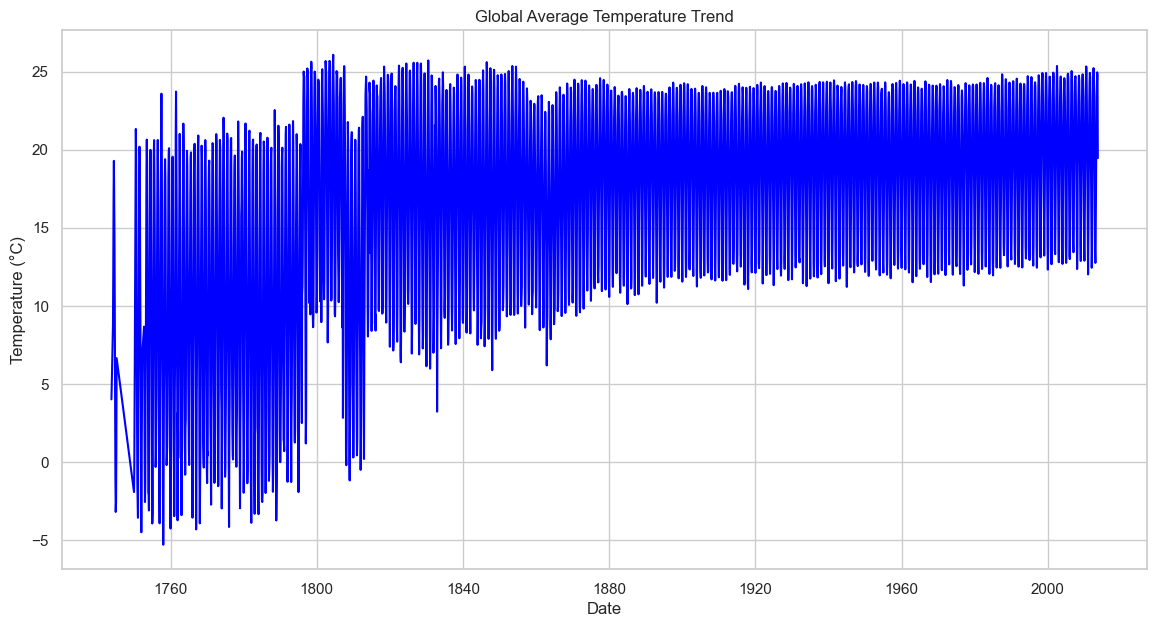

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Plot the global temperature trend using the new monthly aggregation
plt.figure(figsize=(14, 7))
plt.plot(df_monthly.index.to_timestamp(), df_monthly.values, color='blue')
plt.title('Global Average Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.savefig('global_temperature_trend.png', dpi=300)
plt.show()



###### This line plot shows the global average temperature trend over time, based on monthly aggregation. It helps in identifying long-term temperature changes and trends.

### b. Temperature Trends by City

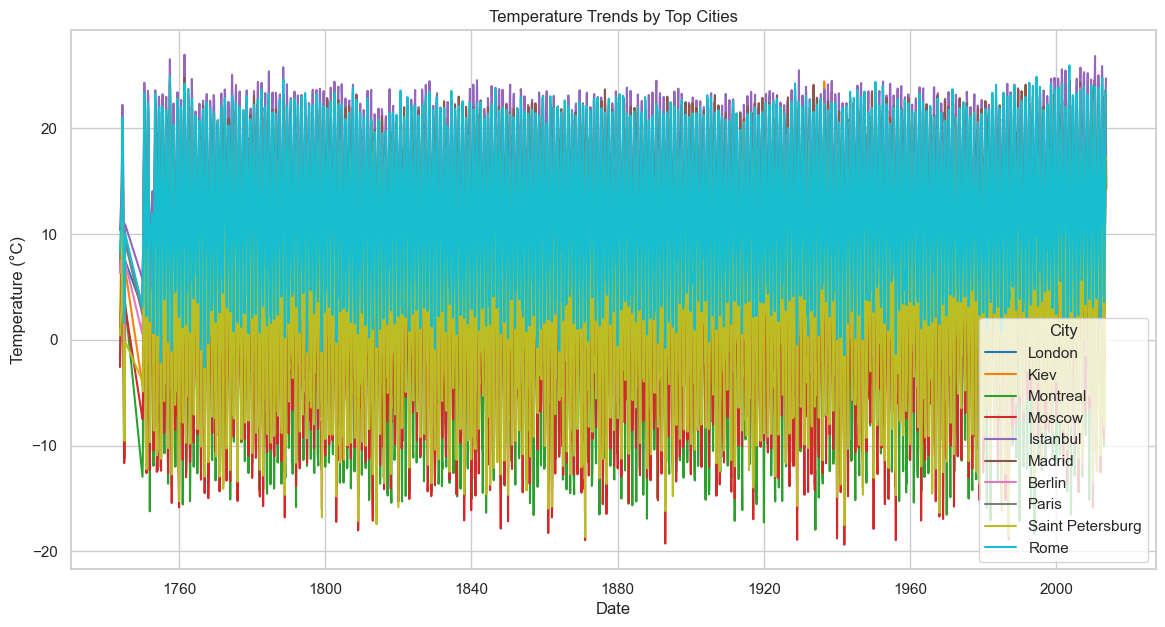

In [72]:
# Plot temperature trends for top cities
top_cities = df['City'].value_counts().head(10).index
df_top_cities = df[df['City'].isin(top_cities)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top_cities, x='dt', y='AverageTemperature', hue='City', palette='tab10')
plt.title('Temperature Trends by Top Cities')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(title='City')
plt.savefig('temperature_trends_by_city.png', dpi=300)
plt.show()

###### This line plot compares temperature trends across the top 10 cities with the highest number of records. It allows us to see how different cities' temperatures vary over time.

### c. Average Temperature by Country

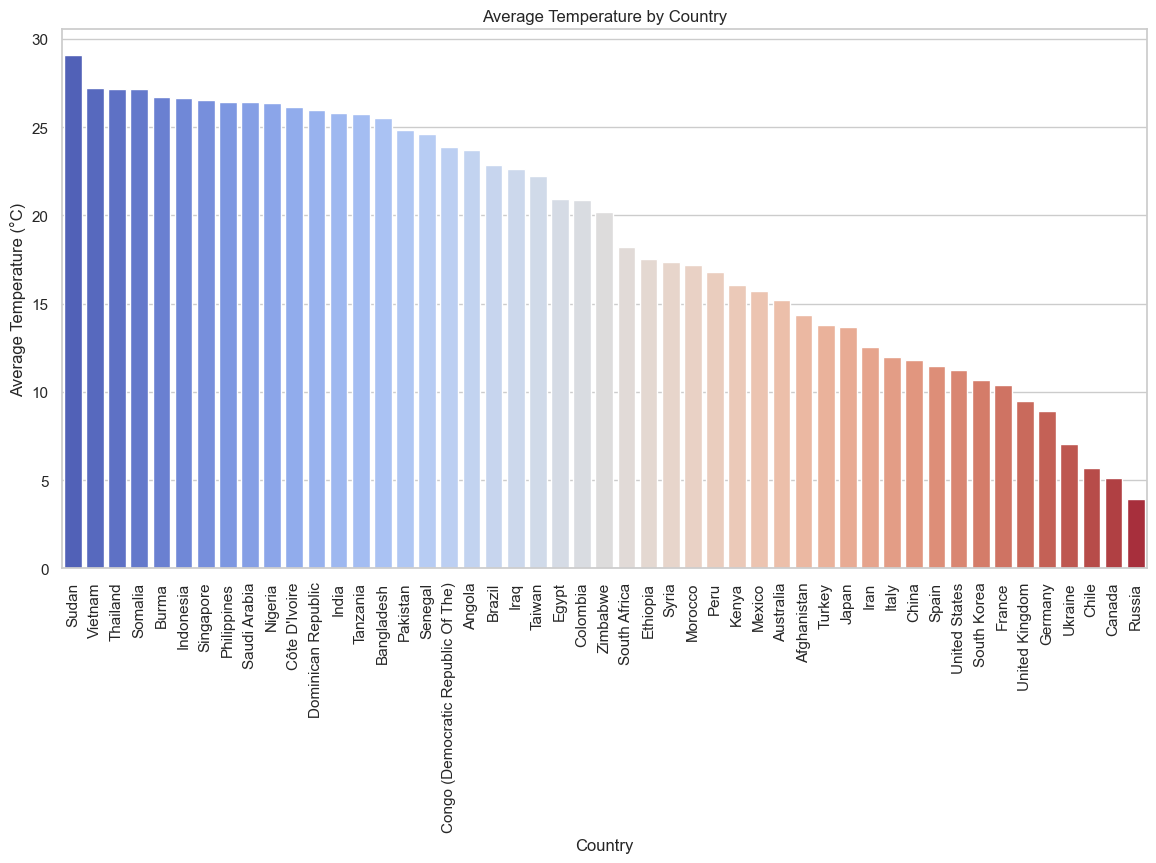

In [73]:
# Create a bar plot for average temperature by country
plt.figure(figsize=(14, 7))
sns.barplot(x=country_avg_temp.index, y=country_avg_temp.values, palette='coolwarm',hue=country_avg_temp.index)
plt.title('Average Temperature by Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)
plt.savefig('Avg_temperature_by_country.png', dpi=300)
plt.show()


###### This bar plot displays the average temperature for each country. It helps in comparing temperature levels across different countries.

***
# 6. Conclusions

#### - **Global Trends**: Summary of global temperature trends over time.
#### - **City Comparisons**: Insights into temperature variations among major cities.
#### - **Country Analysis**: Average temperatures across different countries.